# Load Data
note, we are not splitting the data like normal, we should split into test and train but for purposes of this tutorial, we are learning more about DecisionTree and how they work.

### NOTE the benefit of DecisionTree is that they require very little data preparation, so we do NOT need to do any feature scaling at all! 

Decision Tree can also be used as a regressor. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X= iris.data[:, 2:] #petal length and width
y= iris['target']

tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2 ,criterion='gini')#keep thing simple for now
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### Let's take a look at the tree that was created
You use the export_graphviz() to do this.

In [2]:
from sklearn.tree import export_graphviz
import os
from graphviz import Source

export_graphviz(
                tree_clf,
                out_file= os.path.join(os.getcwd(), 'DecisionTree_Iris.dot'),
                feature_names= iris.feature_names[2:],
                class_names= iris.target_names,
                rounded= True,
                filled= True)

#This does not seem to work for me but let me know if it works for you, I am currently on Windows

# Source.from_file(os.path.join(os.getcwd(), 'DecisionTree_Iris.dot'))


### Decision Tree have attributes and their terminology includes:  

1. Value: how many instances each node applies to
2. Gini: measures impurity of each node. Pure (when gini=0), meaning all instances belong to that node's class. 1 - (ratio of value for each class/overall node sample)^2. If all the instances (i.e. decisions) are wrong then this value will be 1. 
3. Sample: How many instances the node applies to. 

Decision Tree uses yes or no answering so you will find that the depth of your tree will increase tremendously - i.e. Binary trees is produced when it uses something called the 'CART' algorithm. 

### Classification and Regression Tree (CART) 
Greedily Searches the data so that it searches the purest subset. The cost function is a very different to what you are used to seeing because it contains G (the left and right impurity of the subset) as well.
The CART algorithm stops spliting the data until it:
1. reaches the limit set out in the regularization hyperparameter (max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes etc.)

2. Fails to find a split that reduces impurity.  THE AIM IS TO REDUCE IMPURITY TO ZERO! In reality, this is not possible. 

The solution that the CART algorithm gives is not always optimal but is reasonable. 
<b> Computational Complexity </b>
O(n x mlog2(m)), where n is the set max_features (if set) and m is the number of instances. So predictions are <b> really fast even with large training data. </b> 
For example, if the number of instances are 1,000,000 then the depth will be log2(1,000,000) ~ 20 nodes, but in reality the nodes will not be perfectly balanced so it will be more. 
For example, to calculate the how much time it will take to calculate m1=1,000,000 and m2= 10,000,000 instances. Knowing that it takes 1 hour to process m1 instances then to calculate m2 gives:
K = (n x m2)log2(m2)/(n x m1)log2(m1)= 10m1 x log2(10m1)/ m1 x log2(m1) ~ 11.7 hours   


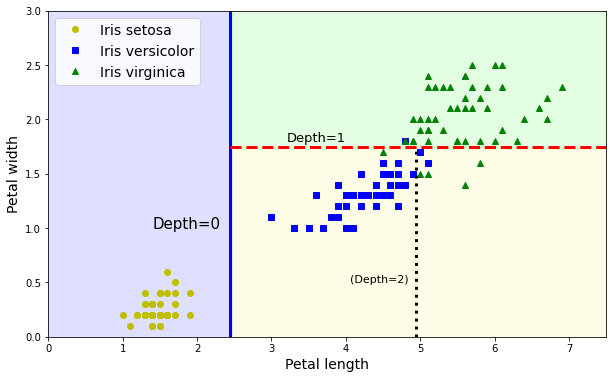

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

#Make a function that we can reuse to plot
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3],
                           iris=True, legend=False, plot_training=True):
    #obtain all the points of the graph and lines you would like to plot
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    #make predictions on the classifier so you can use this value to plot
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    #make it look pretty
    custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    #Assign different colours if not the iris data set
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    #Plot training 
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    
    #Label axis
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    
    #label axis if not iris
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
    if legend:
        plt.legend(loc="upper left", fontsize=14)

plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf, X, y, legend=True, iris= True)

#plot decision boundary lines
plt.plot([2.45, 2.45], [0, 3], "b-", linewidth=3)
plt.plot([2.45, 7.5], [1.75, 1.75], "r--", linewidth=3)


#if max_depth was 3! We should get further seperation on the hashed line, change it and give it
# a go!
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=3)

#Plot depth of the lines, (depth2) occurs only then we use max_depth=3 (i.e. 3 levels down)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### Benefit of Decision Boundary is because they are considered a 'white boxes' you can see how the decision was made, for example less than 2.45cm Petal Length then it is an Iris Setosa. We can see this from the graph. 

### However, RandomForest and Neural Networks are considerd 'black boxes' often it difficult to explain why a certain decision was made. 

Decision Trees can be used for predicting probabilities by using the ratio of value for each class/overall node sample, we obtain a probability. 

For example, there are quite a few instances scattered around Petal Length= 5cm and Petal Width= 1.5cm. It appears that the decision should fall in the Iris Virginica but how does it determine this? It usues the ratio!

We can obtain the probability that an instance belongs to each class by using the predict_proba method. 

In [4]:
tree_clf.predict_proba([[5., 1.5]]) #probability: Setosa: Versicolor: Virginica

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
# now the maximum value determines the class the instance falls under
tree_clf.predict([[5, 1.5]])

array([1])

In [6]:
tree_clf.predict_proba([[5., 0.5]]) #note how probabilities are the same throughout the area
#because DecisionTree uses samples and values to calculate probability of each class 

array([[0.        , 0.90740741, 0.09259259]])

# Gini vs Entropy Impurity? 
#### criterion= gini or criterion= entropy ???

##### Before reading on, there is virtually no difference between the two impurities and you should not bog down too much on analysing the differences because they lead to similiar DecisionTrees. 

Entropy, in thermodynamics, is the movement of molecules disorder. Entropy is zero when at absolute zero. 

A set's (i.e. leaf node) instance is zero entropy when it only contains instances of one class. Similiar to calculating gini, we can use H = -sum(impurity ratio x log2(impurity ratio).
The impurity ratio is the number of class instances by the number of instances - values /samples. 

<i> Reducing entropy is called information gain. </i> 

In [7]:
entropy_tree_clf = DecisionTreeClassifier(random_state=42,max_depth=2, criterion='entropy')
entropy_tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

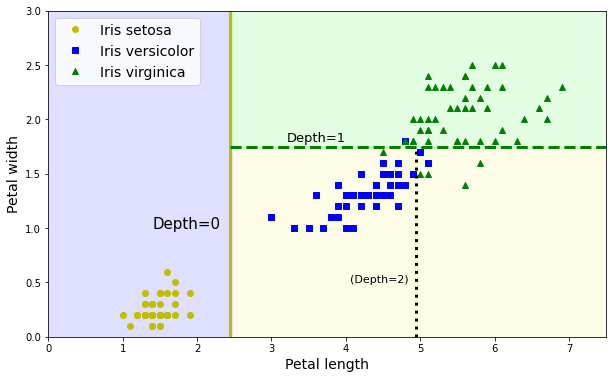

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plot_decision_boundary(entropy_tree_clf, X, y, legend=True, iris= True)

#plot decision boundary lines
plt.plot([2.45, 2.45], [0, 3], "y-", linewidth=3)
plt.plot([2.45, 7.5], [1.75, 1.75], "g--", linewidth=3)


#if max_depth was 3! We should get further seperation on the hashed line, change it and give it
# a go!
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=3)

#Plot depth of the lines, (depth2) occurs only then we use max_depth=3 (i.e. 3 levels down)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

entrop_plot = plt.show()

In [9]:
entropy_tree_clf.predict_proba([[5., 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

# Instability

#### Decision Tree problems

1. Decision Trees are sensitive to small variations in the data.
2. Trees are stochaistic they will yiel different models on the same training set - unless you assign random_state=42 
3. All Decision Trees (decision boundary) split data either horizontally or vertically. So if the orientation of the rotated (say by 45 degrees) then we would have a stepped convoluted decision boundary, that would not generalize well, not a 45degree line that we would expect. 

# One way to obtain better orientation of your training data is to use Principal Component Analysis (PCA)